In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import logging

In [26]:
# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class EmojiSentimentAnalyzer:
    def __init__(self, data):
        if 'sender' not in data.columns or 'message' not in data.columns:
            raise ValueError("Input data must contain 'sender' and 'message' columns.")
        self.data = data.dropna(subset=['message']).reset_index(drop=True)
        # Predefined emoji sentiment scores
        self.emoji_sentiment = {
            # positive emojis
            '😊': 0.8, '❤️': 0.9, '👍': 0.7, '🥰': 0.9, '😍': 0.8, '🤩': 0.8, '😛': 0.5,
            '🤗': 0.7, '🌈': 0.6, '🎉': 0.7, '🏆': 0.6, '😂': 0.5, '🤣': 0.5, '🤪': 0.5,

            # negative emojis
            '😢': -0.7, '😭': -0.8, '😠': -0.6, '🙁': -0.5, '😕': -0.4, 
            '💔': -0.8, '👎': -0.6,

            # neutral emojis
            '🤔': 0, '😐': 0, '🤷': 0, '❓': 0
        }
    
    def extract_emojis(self, text):
        '''Extract all emojis from text'''
        try:
            return [char for char in text if char in emoji.EMOJI_DATA]
        except Exception as e:
            logging.error(f'Error extracting emojis: {e}')
            return []
    
    def analyze_emoji_sentiment(self):
        '''Comprehensive emoji sentiment analysis'''
        try:
            # Extract all emojis from each message
            self.data['emojis'] = self.data['message'].apply(self.extract_emojis)

            # Calculate emoji sentiment
            self.data['emoji_sentiment'] = self.data['emojis'].apply(
                lambda emojis: sum([self.emoji_sentiment.get(emoji, 0) for emoji in emojis]) / len(emojis) if emojis else 0
            )

            # Per-sender emoji sentiment
            sender_emoji_sentiment = self.data.groupby('sender')['emoji_sentiment'].mean()

            # Visualization
            plt.style.use('dark_background')
            plt.figure(figsize=(10, 6))
            sns.barplot(sender_emoji_sentiment.sort_values(ascending=False), color='#128C7E')
            plt.title('Average Emoji Sentiment by Sender', fontsize=16, color='#075E54')
            plt.xlabel(None)
            plt.ylabel(None)
            plt.grid(False)
            plt.tight_layout()
            plt.show()

            # Emoji usage statistics
            emoji_counts = self.data.explode('emojis')['emojis'].value_counts()
            overall_sentiment = self.data['emoji_sentiment'].mean()

            logging.info(
                f'\n Sender emoji sentiment: \n {sender_emoji_sentiment} \n Total emoji counts: \n {emoji_counts} \n Overall emoji sentiment: \n {overall_sentiment}'
            )

            return {
                'Sender Emoji Sentiment': sender_emoji_sentiment,
                'Total Emoji Count': emoji_counts,
                'Overall Emoji Sentiment': overall_sentiment
            }
        except Exception as e:
            logging.error(f'Error during emoji sentiment analysis: {e}')
    
    def export_to_csv(self, output_path):
        '''
        Export the updated data to a CSV file.
        output_path: Path to save the CSV file.
        '''
        self.data.to_csv(output_path, index=False)
        print(f'\n Updated data exported successfully to {output_path}')

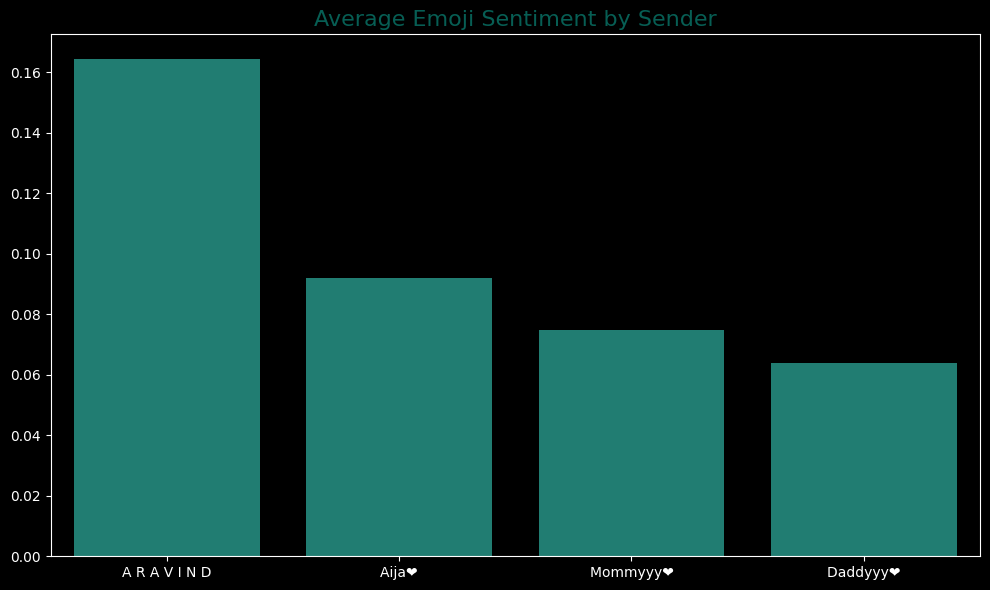


 Emoji Sentiment Analysis Results:

 Sender Emoji Sentiment: 
 sender
A R A V I N D    0.164277
Aija❤️           0.091903
Daddyyy❤️        0.063975
Mommyyy❤️        0.074704
Name: emoji_sentiment, dtype: float64

 Total Emoji Count: 
 emojis
😂    2505
🤣     659
😍     632
😁     229
🤩     175
     ... 
🍰       1
🍡       1
🦰       1
🦁       1
🤘       1
Name: count, Length: 209, dtype: int64

 Overall Emoji Sentiment: 
 0.1026746767847105

 Updated data exported successfully to Whatsapp_Chat.csv


In [27]:
# Load the data
data = pd.read_csv('Whatsapp_Chat.csv')

# Initialize the class with data
emoji_sentiment = EmojiSentimentAnalyzer(data)

# Analyze emoji sentiment
emoji_analysis = emoji_sentiment.analyze_emoji_sentiment()

# Print the results
if emoji_analysis:
    print('\n Emoji Sentiment Analysis Results:')
    print(f"\n Sender Emoji Sentiment: \n {emoji_analysis['Sender Emoji Sentiment']}")
    print(f"\n Total Emoji Count: \n {emoji_analysis['Total Emoji Count']}")
    print(f"\n Overall Emoji Sentiment: \n {emoji_analysis['Overall Emoji Sentiment']}")

# Export updated data to CSV
emoji_sentiment.export_to_csv('Whatsapp_Chat.csv')